In [3]:
#Shishir Khanal
#CMU-Optimal Controls from Jack Manchester
#Optimization: Minimization

In [4]:
import Pkg;
Pkg.activate(@__DIR__);
Pkg.instantiate();

Pkg.add("LinearAlgebra");
Pkg.add("PyPlot");
Pkg.add("ForwardDiff");

using LinearAlgebra;
using PyPlot;
using ForwardDiff;

  Activating project at `~/Documents/Optimal_Control/Sims/Optimization`
   Resolving package versions...
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Project.toml`
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Project.toml`
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Project.toml`
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Manifest.toml`


In [27]:
function f(x)
    return x.^4 + x.^3 - x.^2 - x
end

f (generic function with 1 method)

In [28]:
function ∇f(x)
    return 4.0*x^.3 + 3.0*x.^2 - 2.0*x -1.0
end

∇f (generic function with 1 method)

In [29]:
function ∇2f(x)
    return 12.0*x.^2 + 6.0*x -2.0
end

∇2f (generic function with 1 method)

In [30]:
x = LinRange(-1.75, 1.25, 1000)

1000-element LinRange{Float64, Int64}:
 -1.75,-1.747,-1.74399,-1.74099,-1.73799,…,1.23799,1.24099,1.24399,1.247,1.25

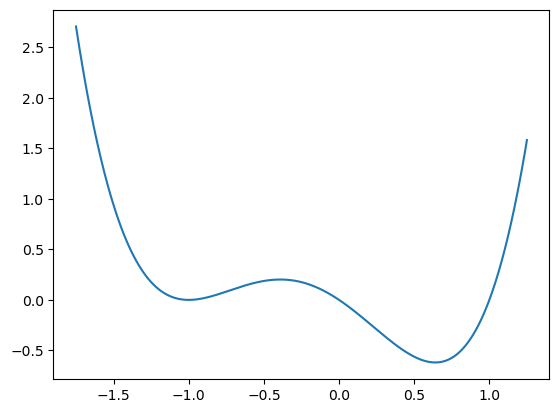

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f29c75e6610>

In [31]:
p = plot(x, f(x))

In [32]:
function newton_step(x0)
    xn = x0 - ∇2f(x0)\∇f(x0)
end

newton_step (generic function with 1 method)

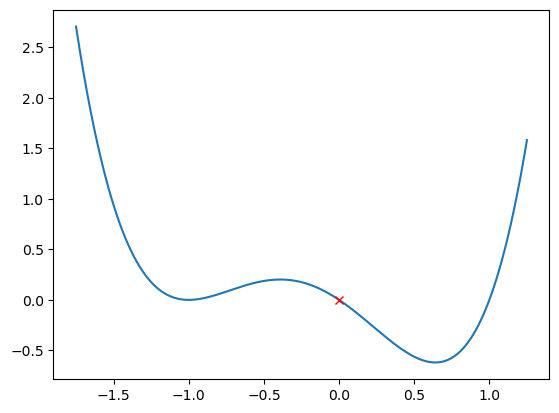

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f29c7573040>

In [33]:
xguess = 0.0
plot(x,f(x))
plot(xguess, f(xguess), "rx")    

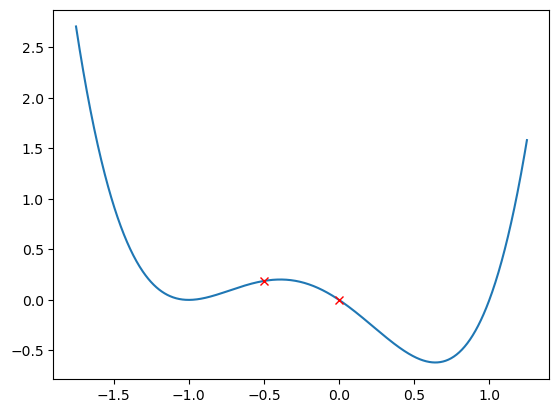

2-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f29c74e7f10>
 PyObject <matplotlib.lines.Line2D object at 0x7f29c74e7fa0>

In [34]:
xnew = newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")

In [35]:
∇2f(0.0)

-2.0

In [43]:
function regularized_newton_step(x0)
    β = 1.0
    H = ∇2f(x0)
    #check if Hessian in positive definite
    while !isposdef(H)
        #Pad it if H is not positive definite
        H = H + β*I
    end
    xn = x0 - H\∇f(x0)
end

regularized_newton_step (generic function with 1 method)

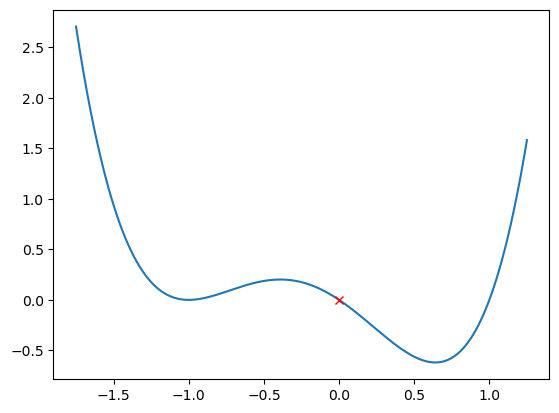

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f29c72cad30>

In [44]:
xguess = 0.0
plot(x,f(x))
plot(xguess, f(xguess), "rx")

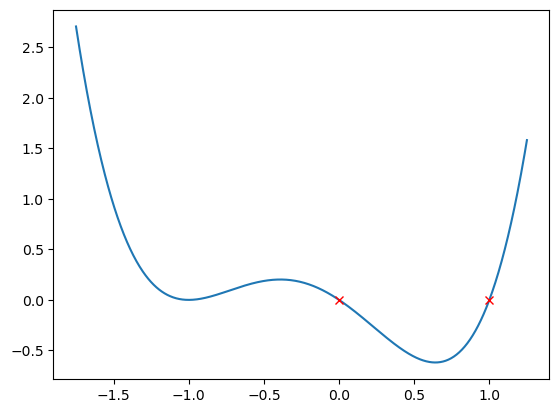

2-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f29c7135940>
 PyObject <matplotlib.lines.Line2D object at 0x7f29c71359d0>

In [45]:
xnew = regularized_newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")